# ¿Cómo se hacen los gráficos?
Para los tres gráficos a realizar necesitamos los siguiente paquetes:

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.style as style
style.use('fivethirtyeight')
from matplotlib.patches import Polygon

## Primera gráfica 
Veamos primero los datos a graficar:

In [17]:
fandango_tab=pd.read_csv("fandango_scrape.csv")
fandango_tab.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


Como deseamos concentrarnos en las películas del 2015 y con 30 o más votos, debemos filtrar la tabla anterior bajo esas condiciones.  
Filtramos primero por año:

In [18]:
fandango_array= fandango_tab.values
year=[]
for i in range(fandango_array.shape[0]):
    year.append(fandango_array[i,0][-5:-1])
index_year=(np.array(year)=='2015')
fandango_year=fandango_array[index_year,:]

Filtramos ahora por votos:

In [19]:
votes=[]
for i in range(fandango_year.shape[0]):
    votes.append(fandango_year[i,3])
index_votes=(np.array(votes)>=30)
fandango=fandango_year[index_votes,:]

Ya con nuestros datos filtrados encontramos ahora para cada estrella, el porcentaje de películas que están en esa clasificación:

In [20]:
percent=[]
stars = np.arange(0.5,5.5,0.5)
for i in stars:
    percent.append((fandango[:,1]==i).sum())
percent=np.array(percent)
per=percent*(100/fandango.shape[0])

Tenemos entonces nuestras variables a graficar:
* _stars_ que es un array con el número de estrellas en cada entrada.
* _per_ que es un array que contiene el porcentaje de películas por estrella en cada entrada. 

Procedemos entonces a realizar el gráfico:

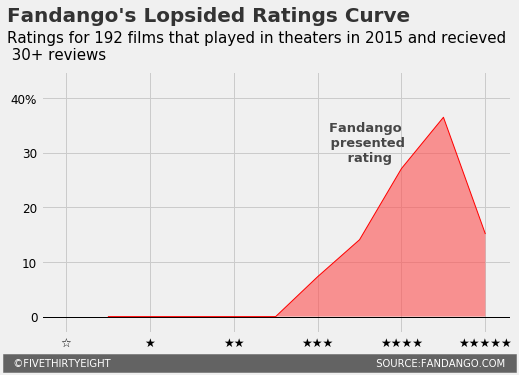

In [21]:
plt.figure(figsize=(7.5,4.5))
plt.plot(stars,per,color='red',linewidth=1)

#Ajustamos el tamaño de letra en los ejes
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)

#Ajustamos el largo de cada eje
plt.ylim(-3,+45)
plt.xlim(-0.3,+5.3)

#Cambiamos la graduación de los ejes
plt.xticks([0,1,+2,+3,+4,+5],['☆','★','★★','★★★','★★★★','★★★★★'])
plt.yticks([0,+10,+20,+30,+40],['0','10','20','30','40%'])

#Añadimos una línea horizontal en el eje x
ax.axhline(y=0, color = 'black',linewidth = 1,zorder=1)

#Añadimos una barra con información del gráfico
ax.text(x=-0.7,y=-9,s='  ©FIVETHIRTYEIGHT                                                                                     SOURCE:FANDANGO.COM  ',
        fontsize = 10, color = '#ffffff', backgroundcolor = '#636363')

#Añadimos el título del gráfico
ax.text(x=-0.7,y=54,s="Fandango's Lopsided Ratings Curve",fontsize=20,color = '#333333',weight = 'bold')

#Añadimos el subtítulo del gráfico
ax.text(x=-0.7,y=47,s="Ratings for 192 films that played in theaters in 2015 and recieved \n 30+ reviews",fontsize=15)

#Añadimos una leyenda en el gráfico
ax.text(x=3.1,y=28.5,s="Fandango \n presented \n rating",fontsize=13,color='#474747',weight='bold',multialignment='center')

#Sombreamos el área bajo gráfica
verts=[]
for i in range(1,7):
    verts.append([2+i*0.5,per[3+i]])
verts.append([5,0])
poly = Polygon(verts, facecolor='#ff5151',alpha=0.6)
ax.add_patch(poly)

## Segunda gráfica
Veamos primero los datos a graficar:

In [22]:
comparision_tab=pd.read_csv("fandango_score_comparison.csv")
comparision_tab.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Encontramos ahora para cada estrella, el porcentaje de películas que están en esa clasificación (no fue necesario un filtrado porque se usan todas las películas para graficar):

In [23]:
comparision=np.array(comparision_tab)
for j in range (6,18):
    percent=[]
    for i in stars:
        percent.append((comparision[:,j]==i).sum())
    percent=np.array(percent)
    per=percent*(100/comparision.shape[0])
    if j==13:
        per_rt=per
    if j==14:
        per_rtu=per
    if j==15:
        per_m=per
    if j==16:
        per_mu=per
    if j==17:
        per_im=per
    if j==6:
        per_f=per

Nuevamente tenemos nuestras variables a graficar:
* _stars_ que es un array con el número de estrellas en cada entrada.
* **per_rt** que es un array que contiene el porcentaje de películas por estrella en cada entrada para Rotten Tomatoes. 
* **per_rtu** que es un array que contiene el porcentaje de películas por estrella en cada entrada para Rotten Tomatoes Users. 
* **per_m** que es un array que contiene el porcentaje de películas por estrella en cada entrada para Metacritic. 
* **per_m** que es un array que contiene el porcentaje de películas por estrella en cada entrada para Metacritic Users.
* **per_im** que es un array que contiene el porcentaje de películas por estrella en cada entrada para IMBd. 
* **per_f** que es un array que contiene el porcentaje de películas por estrella en cada entrada para Fandango. 

Procedemos entonces a realizar el gráfico:

<function matplotlib.pyplot.show>

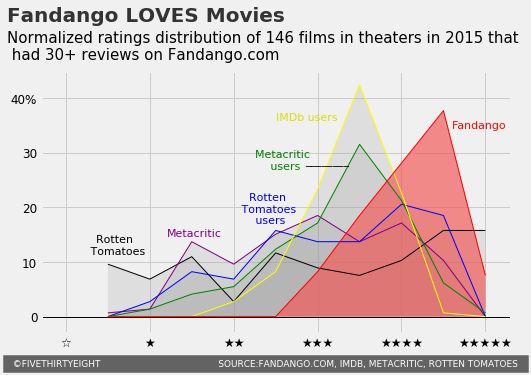

In [25]:
plt.figure(figsize=(7.5,4.5))
plt.plot(stars,per_rt,color='black',linewidth=1)
plt.plot(stars,per_m,color='purple',linewidth=1)
plt.plot(stars,per_rtu,color='blue',linewidth=1)
plt.plot(stars,per_mu,color='green',linewidth=1)
plt.plot(stars,per_im,color='yellow',linewidth=1)
plt.plot(stars,per_f,color='red',linewidth=1)

#Ajustamos el tamaño de letra en los ejes
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)

#Ajustamos el largo de cada eje
plt.ylim(-3,+45)
plt.xlim(-0.3,+5.3)

#Cambiamos la graduación de los ejes
plt.xticks([0,1,+2,+3,+4,+5],['☆','★','★★','★★★','★★★★','★★★★★'])
plt.yticks([0,+10,+20,+30,+40],['0','10','20','30','40%'])

#Añadimos una línea horizontal en el eje x
ax.axhline(y=0, color = 'black',linewidth = 1,zorder=1)

#Añadimos una barra con información del gráfico
ax.text(x=-0.7,y=-9,s='  ©FIVETHIRTYEIGHT                                         SOURCE:FANDANGO.COM, IMDB, METACRITIC, ROTTEN TOMATOES  ',
        fontsize = 9, color = '#ffffff', backgroundcolor = '#636363')

#Añadimos el título del gráfico
ax.text(x=-0.7,y=54,s="Fandango LOVES Movies ",fontsize=20,color = '#333333',weight = 'bold')

#Añadimos el subtítulo del gráfico
ax.text(x=-0.7,y=47,s="Normalized ratings distribution of 146 films in theaters in 2015 that \n had 30+ reviews on Fandango.com",fontsize=15)

#Añadimos leyendas para cada curva del gráfico
ax.text(x=4.6,y=34.5,s="Fandango",fontsize=11,color='red')
ax.text(x=2.5,y=36,s="IMDb users",fontsize=11,color='#d7e000')
ax.text(x=2.25,y=27,s="Metacritic \n users",fontsize=11,color='green',multialignment='center')
ax.text(x=2.85,y=28,s="________",fontsize=11,color="black")
ax.text(x=2.05,y=17,s="Rotten \n Tomatoes \n users",fontsize=11,color='blue',multialignment='center')
ax.text(x=1.2,y=14.8,s="Metacritic",fontsize=11,color='purple')
ax.text(x=0.25,y=11.5,s="Rotten \n Tomatoes",fontsize=11,color='black',multialignment='center')

#Sombreamos el área bajo cada curva
for i in range(7):
    verts=[[0.5,0]]
    color='#999999'
    al=0.2
    if i==1:
        per=per_rt
    if i==2:
        per=per_m
    if i==3:
        per=per_rtu
    if i==4:
        per=per_mu
    if i==5:
        per=per_im
    if i==6:
        per=per_f
        color='#ff5151'
        al=0.6
    for j in range(1,11):
        verts.append([j*0.5,per[j-1]])
    verts.append([5,0])
    poly=Polygon(verts, facecolor=color,alpha=al)
    ax.add_patch(poly)
plt.show

## Tercera gráfica
Veamos primero los datos a graficar:

In [26]:
votes=[]
for i in range(comparision.shape[0]):
    votes.append([comparision_tab.values[i,0],comparision_tab.values[i,-4],comparision_tab.values[i,-3],comparision_tab.values[i,-2]])
column=['FILM','Metacritic_user_vote_count','IMDb_user_vote_count','Fandango_votes']
votes_tab=pd.DataFrame(votes,columns=column)
votes_tab.head()

,FILM,Metacritic_user_vote_count,IMDb_user_vote_count,Fandango_votes
0,Avengers: Age of Ultron (2015),1330,271107,14846
1,Cinderella (2015),249,65709,12640
2,Ant-Man (2015),627,103660,12055
3,Do You Believe? (2015),31,3136,1793
4,Hot Tub Time Machine 2 (2015),88,19560,1021


Encontramos ahora para cada estrella, el porcentaje de votos que tuvieron las películas que están en esa clasificación:

In [27]:
votes=np.array(votes_tab)
rango=[6,16,17]
vote_f=np.zeros(stars.shape[0])
vote_m=np.zeros(stars.shape[0])
vote_im=np.zeros(stars.shape[0])
for j in rango:
    for i in range(votes.shape[0]):
        l=0
        for k in stars:
            if (comparision[i,j]==k)==True:
                if j==6:
                    vote_f[l]=vote_f[l]+votes[i,3]
                if j==16:
                    vote_m[l]=vote_m[l]+votes[i,1]
                if j==17:
                    vote_im[l]=vote_im[l]+votes[i,2]
            l=l+1
percent_f=(100/vote_f.sum())*vote_f
percent_m=(100/vote_m.sum())*vote_m
percent_im=(100/vote_im.sum())*vote_im

Tenemos entonces nuestras variables a graficar:
* _stars_ que es un array con el número de estrellas en cada entrada.
* **percent_m** que es un array que contiene el porcentaje de votos de películas por estrella en cada entrada para Metacritic. 
* **percent_im** que es un array que contiene el porcentaje de votos de películas por estrella en cada entrada para IMBd. 
* **percent_f** que es un array que contiene el porcentaje de votos de películas por estrella en cada entrada para Fandango. 

Procedemos entonces a realizar el gráfico:

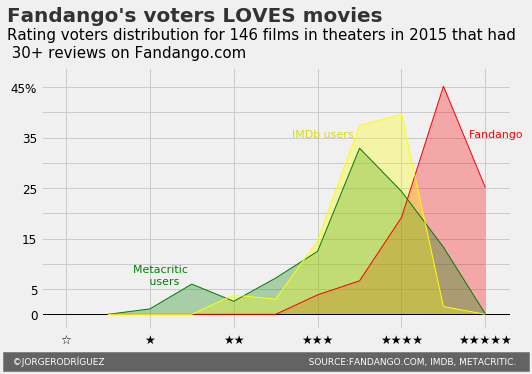

In [28]:
plt.figure(figsize=(7.5,4.5))
plt.plot(stars,percent_m,color='green',linewidth=1)
plt.plot(stars,percent_f,color='red',linewidth=1)
plt.plot(stars,percent_im,color='yellow',linewidth=1)

#Ajustamos el tamaño de letra en los ejes
ax = plt.gca()
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(12)
    
#Ajustamos el largo de cada eje
plt.ylim(-3,+49)
plt.xlim(-0.3,+5.3)

#Cambiamos la graduación de los ejes
plt.xticks([0,1,+2,+3,+4,+5],['☆','★','★★','★★★','★★★★','★★★★★'])
plt.yticks([0,+5,+10,+15,+20,+25,+30,+35,+40,+45],['0','5',' ','15',' ','25',' ','35',' ','45%'])

#Añadimos una línea horizontal en el eje x
ax.axhline(y=0, color = 'black',linewidth = 1,zorder=1)

#Añadimos una barra con información del gráfico
ax.text(x=-0.7,y=-10,s='  ©JORGERODRÍGUEZ                                                                       SOURCE:FANDANGO.COM, IMDB, METACRITIC.   ',
        fontsize = 9, color = '#ffffff', backgroundcolor = '#636363')

#Añadimos el título del gráfico
ax.text(x=-0.7,y=58,s="Fandango's voters LOVES movies ",fontsize=20,color = '#333333',weight = 'bold')

#Añadimos el subtítulo del gráfico
ax.text(x=-0.7,y=51,s="Rating voters distribution for 146 films in theaters in 2015 that had \n 30+ reviews on Fandango.com",fontsize=15)

#Añadimos leyendas para cada curva del gráfico
ax.text(x=4.8,y=35,s="Fandango",fontsize=11,color='red')
ax.text(x=2.7,y=35,s="IMDb users",fontsize=11,color='#d7e000')
ax.text(x=0.8,y=6,s="Metacritic \n users",fontsize=11,color='green',multialignment='center')

#Sombreamos el área bajo cada curva
for i in range(3):
    verts=[[0.5,0]]
    if i==0:
        percent=percent_f
        color="red"
        verts=[[2.5,0]]
    if i==1:
        percent=percent_m
        color="green"
    if i==2:
        percent=percent_im
        color="yellow"
    for j in range(1,11):
        verts.append([j*0.5,percent[j-1]])
    verts.append([5,0])
    poly=Polygon(verts, facecolor=color,alpha=0.3)
    ax.add_patch(poly)